# Aunalytics Problem Statement 
## Build a classifier to predict person's income as lesser/greater than $50k.

**Author**: Ashwin Padmanabhan  
**Date**: 2/29/2020

## Step 1: Get the training/test set and take a very quick look:

In [6]:
#Function to fetch the training and testing sets.

import os
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

data_folder_path = "datasets";

def fetch_data(datafilename, data_folder_path = data_folder_path):
        """
        Description: Function to read *.csv file in folder path 'data_folder_path' with name 'datafilename'. 
        
        Parameters:
        ------------

        datafilename = name of *.csv file.  
        data_folder_path = Dataset folder path. 

        Returns: 
        --------
        pd Dataframe 
        """
        
        data_url = os.path.join(data_folder_path, datafilename)
        return pd.read_csv(data_url)
    
train_set = fetch_data("au_train.csv")
test_set = fetch_data("au_test.csv")
train_set.head(10)

'\nFunction to fetch the training and testing sets.\n'

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Intially, we don't have any use for the test_set. We will park it aside and proceed to make some sense of the training data and what we are dealing with! 

In [7]:
#Quick look: Getting familiar with the data.

train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Initial Takeaways: 
    - No null values.
    - 32,561 instances to train with - Fairly small/small-medium dataset. 
    - 6 numerical featuers, 7 "possible" categorical/ordinal features. 
    - Suspect categorical "education" is same as feature "education-num". 

In [8]:
#Eye-balling categorical variables. 

train_set["native-country"].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

#### Intial Categorical Features takeaways: 
    - Missing values in Workclass/occupation/country have category in form of '?'.
    - Need to potentially remove/replace these instances. 

In [9]:
#Now zooming in on the numerical fields: 

train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


#### Numerical Features takeaways: 
    - Scales different. Need to think about best way to re-scale, based on model used. 
    - capital-gain looks weird. Suspecting skewed data, or even perhaps incorrect entry or maybe it it capped. Perhaps similar to capital-loss. 
    - Hours per week might be capped too. 

## Step 2: Exploratory Data Analysis (EDA)

We have only taken only a very quick glance at the data. Let us go into some more depth. We should create a copy of the training set, so that we can play with it without risk of harming the traning set. 
Since the training data is relatively small, we can work with the whole set. 

In [10]:
salary = train_set.copy()

### Insights on Numerical Features: 

Let us deep-dive into the numerical features first. Let us start with getting the numerical labels. 

In [11]:
#Getting the numerical labels. 

numerical_labels = list(salary.select_dtypes(include=['int64']).columns)
#numerical_labels

#### Histograms for numerical features: 
Histograms give lot of insight into frequency of data-points and depending on the model that is used, potential distributions that could model the data. 


/Users/ashwinpadmanabhan/Desktop/Spring2020/Aunalytics_ProblemStatement/AEnv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/ashwinpadmanabhan/Desktop/Spring2020/Aunalytics_ProblemStatement/AEnv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/ashwinpadmanabhan/Desktop/Spring2020/Aunalytics_ProblemStatement/AEnv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be remo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11801f748>,
      dtype=object)

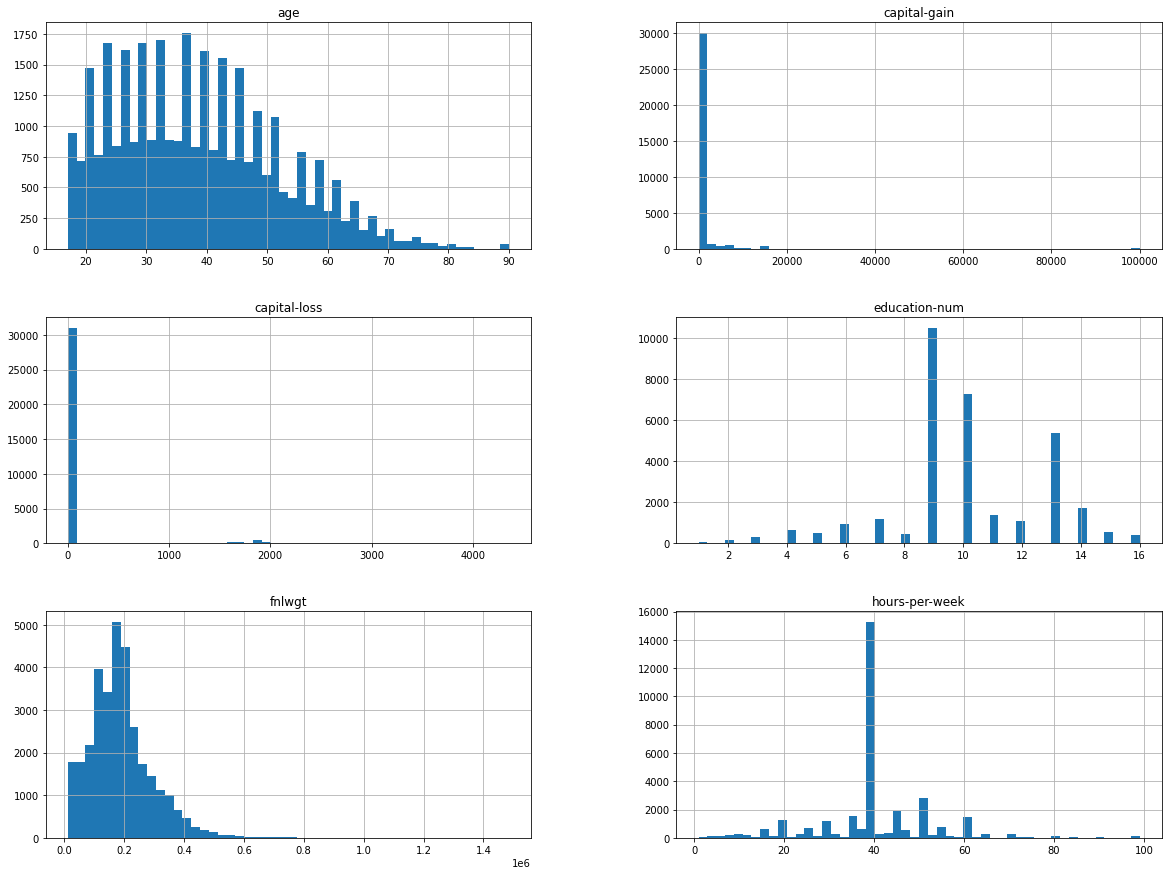

In [12]:
#Plotting histograms for numerical features.

%matplotlib inline
import matplotlib.pyplot as plt

salary.hist(bins = 50, figsize = (20,15))

#### Inferences from histograms:  

- No concrete evidence to prove Capital Gain does not seem to be capped. 
- A few tail heavy features. Need to tackle this. 

#### Correlation among numerical features: 

We are looking for clear correlation among the numerical variables using correlation and corresponding scatter matrix. This helps check if the features are dependent in any way as well as show how each numerical variable affects the target class. 

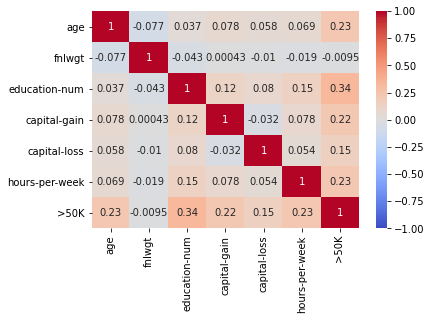

In [13]:
import seaborn as sns
from pandas.plotting import scatter_matrix

df_dummies = pd.get_dummies(salary['class'])
df_new = pd.concat([salary, df_dummies[" >50K"]], axis=1)

corr_matrix = df_new.corr()
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, center = 0, cmap = "coolwarm")

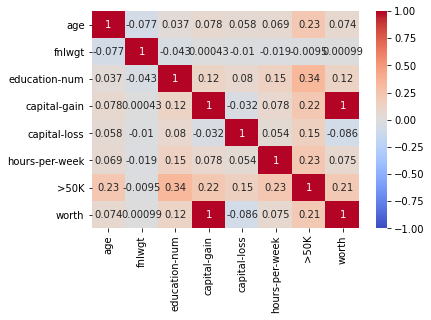

In [14]:
#Let us check if we can potentially combine worth = (capital-gain - capital-loss). 

df_new["worth"] = (df_new["capital-gain"] - df_new["capital-loss"])

corr_matrix = df_new.corr()
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, center = 0, cmap = "coolwarm")

#### Inferences from Correlation matrix: 
- From first looks, seems like there isn't a significant correlation between any features. The highest being between hours-per-week and education-num at 0.15, which still isn't all that high. However, since this only measures linear independence, let us proceed to look at the scatter-plots. 

- Also, we see that all numerical features have some correlation with the positive (>50k) class, except the fnlwgt feature. This gives us reason to consider removing this feature. 

- Seems like "worth" is highly correlated to capital gain, perhaps because most instance have capital loss = 0. We will combine the two instances. 

/Users/ashwinpadmanabhan/Desktop/Spring2020/Aunalytics_ProblemStatement/AEnv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/ashwinpadmanabhan/Desktop/Spring2020/Aunalytics_ProblemStatement/AEnv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/ashwinpadmanabhan/Desktop/Spring2020/Aunalytics_ProblemStatement/AEnv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be remo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b3bfdd8>,
      dtype=object)

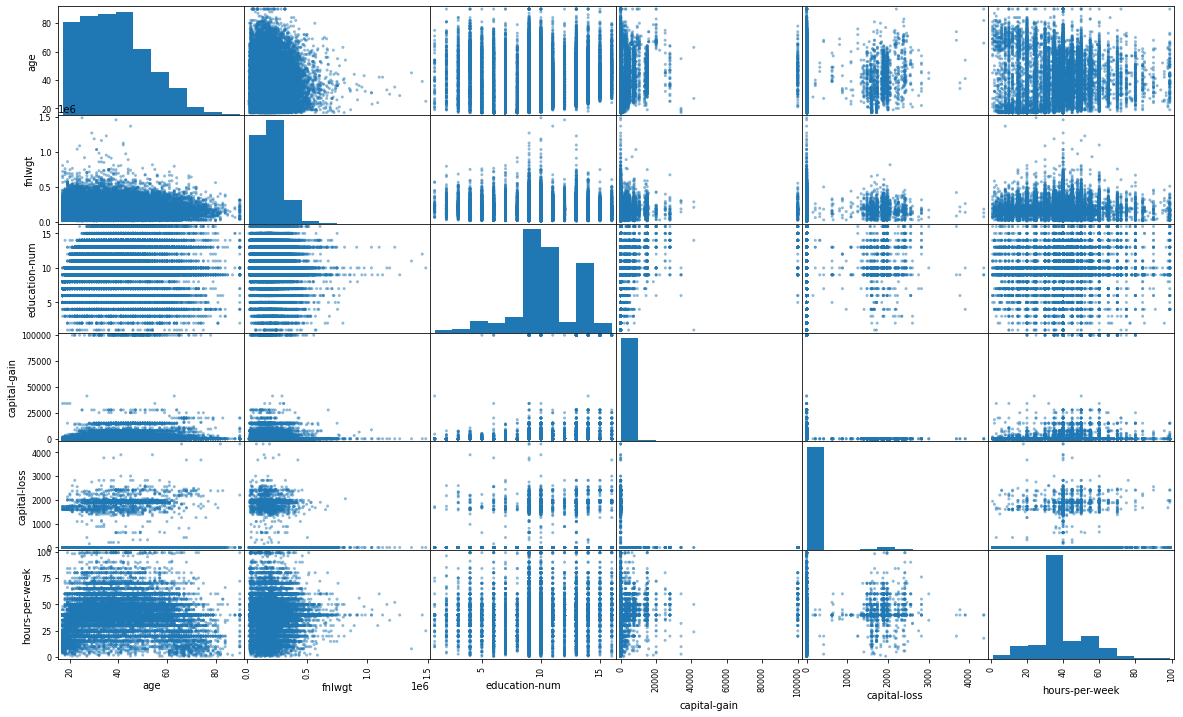

In [15]:
#Visualizing this in the form of a scatter-plot matrix. 

attributes = list(salary.corr().columns)
scatter_matrix(salary[attributes], figsize = (20,12))

#### Inferences from Scatter-Plot Matrix: 

No clear trends. Some minor points: 

- age v fnlwgt: Lower age has highre fnlwgt. 
- fnlwgt v education-num: Weak proof of higher fnlwgt for moderate-high education nums.
- fnlwgt v capital-loss: Weak proof of higher fnlwgt for moderate capital-loss.
- fnlwgt v hours-per-week: Weak proof of higher fnlwgt for moderate hours-per-week.

fnlwgt seems slightly troubling. Let us check effect of this and other features on the class prediction. 

#### Boxplots for numerical features:

Let us use box-plots to compare each numerical features against the class associated. The give us insight into trends and how features are affecting the class. 


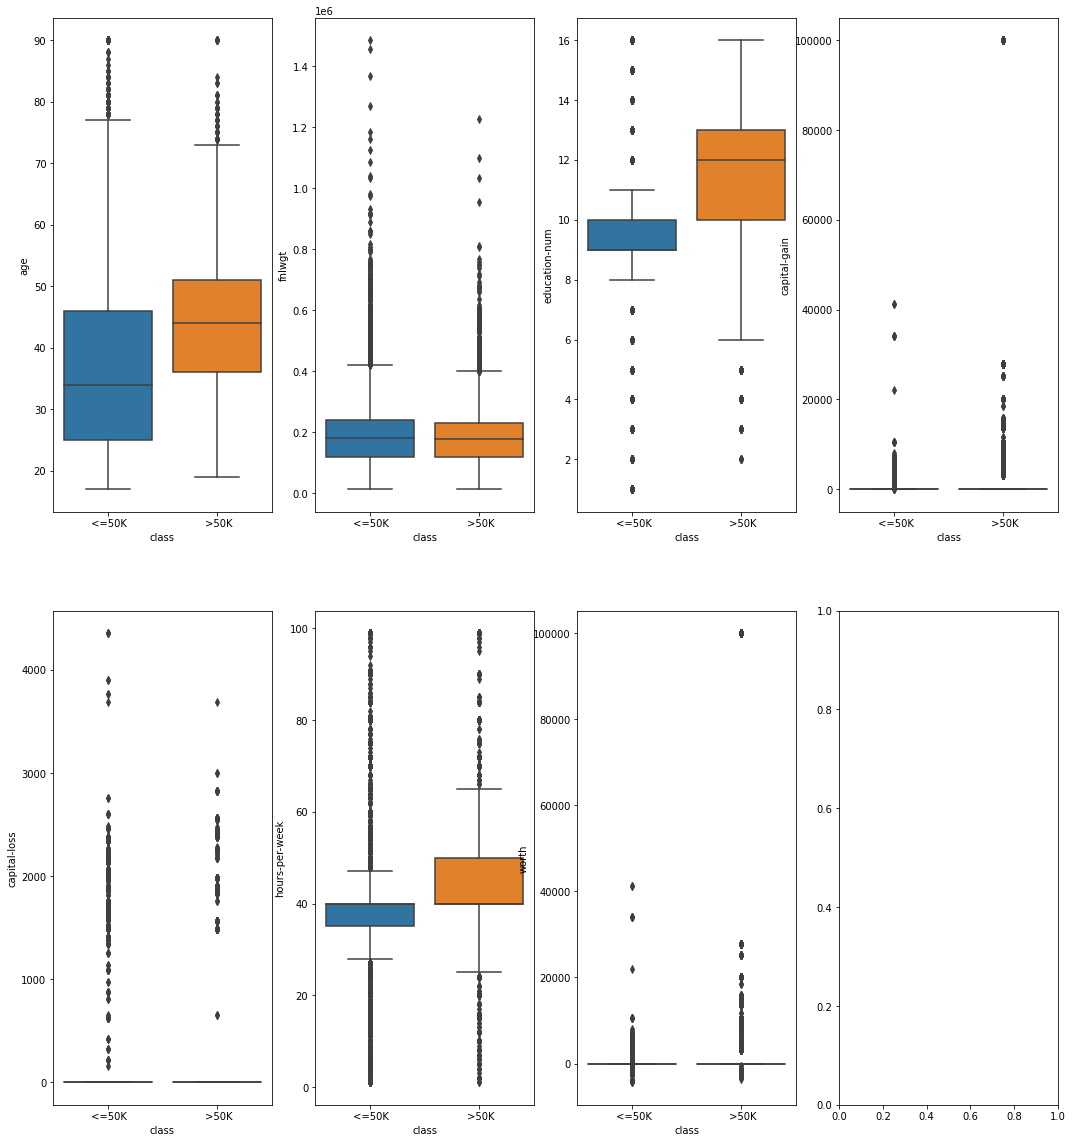

In [16]:
#Drawing box-plot using seaborn

fig, ax = plt.subplots(2, 4, figsize=(18, 20))
labels = numerical_labels + ["worth"]
for variable, subplot in zip(labels, ax.flatten()):
    sns.boxplot(x =df_new["class"], y= df_new[variable], ax=subplot)

#### Inferences from Boxplots:

- The older you are, more likely that you earn more. 
- Higher your education_num, more likely you earn more. 
- People working more number of hours are more likely to earn more than 50k.
- fnl-weight seems to have no effect on the class. We will remove this.  

### Insights on Categorical/Ordinal Features: 

Let us deep-dive into the Categorical/Ordina features next. Let us start with getting the labels. 

In [17]:
#Get categorical labels: 
categorical_labels = list(salary.select_dtypes(include=['object', 'category']).columns)
#categorical_labels

#### Count-Plots for Categorical/Ordinal features: 

Count-Plots give insight into frequency of each category within each feature.  

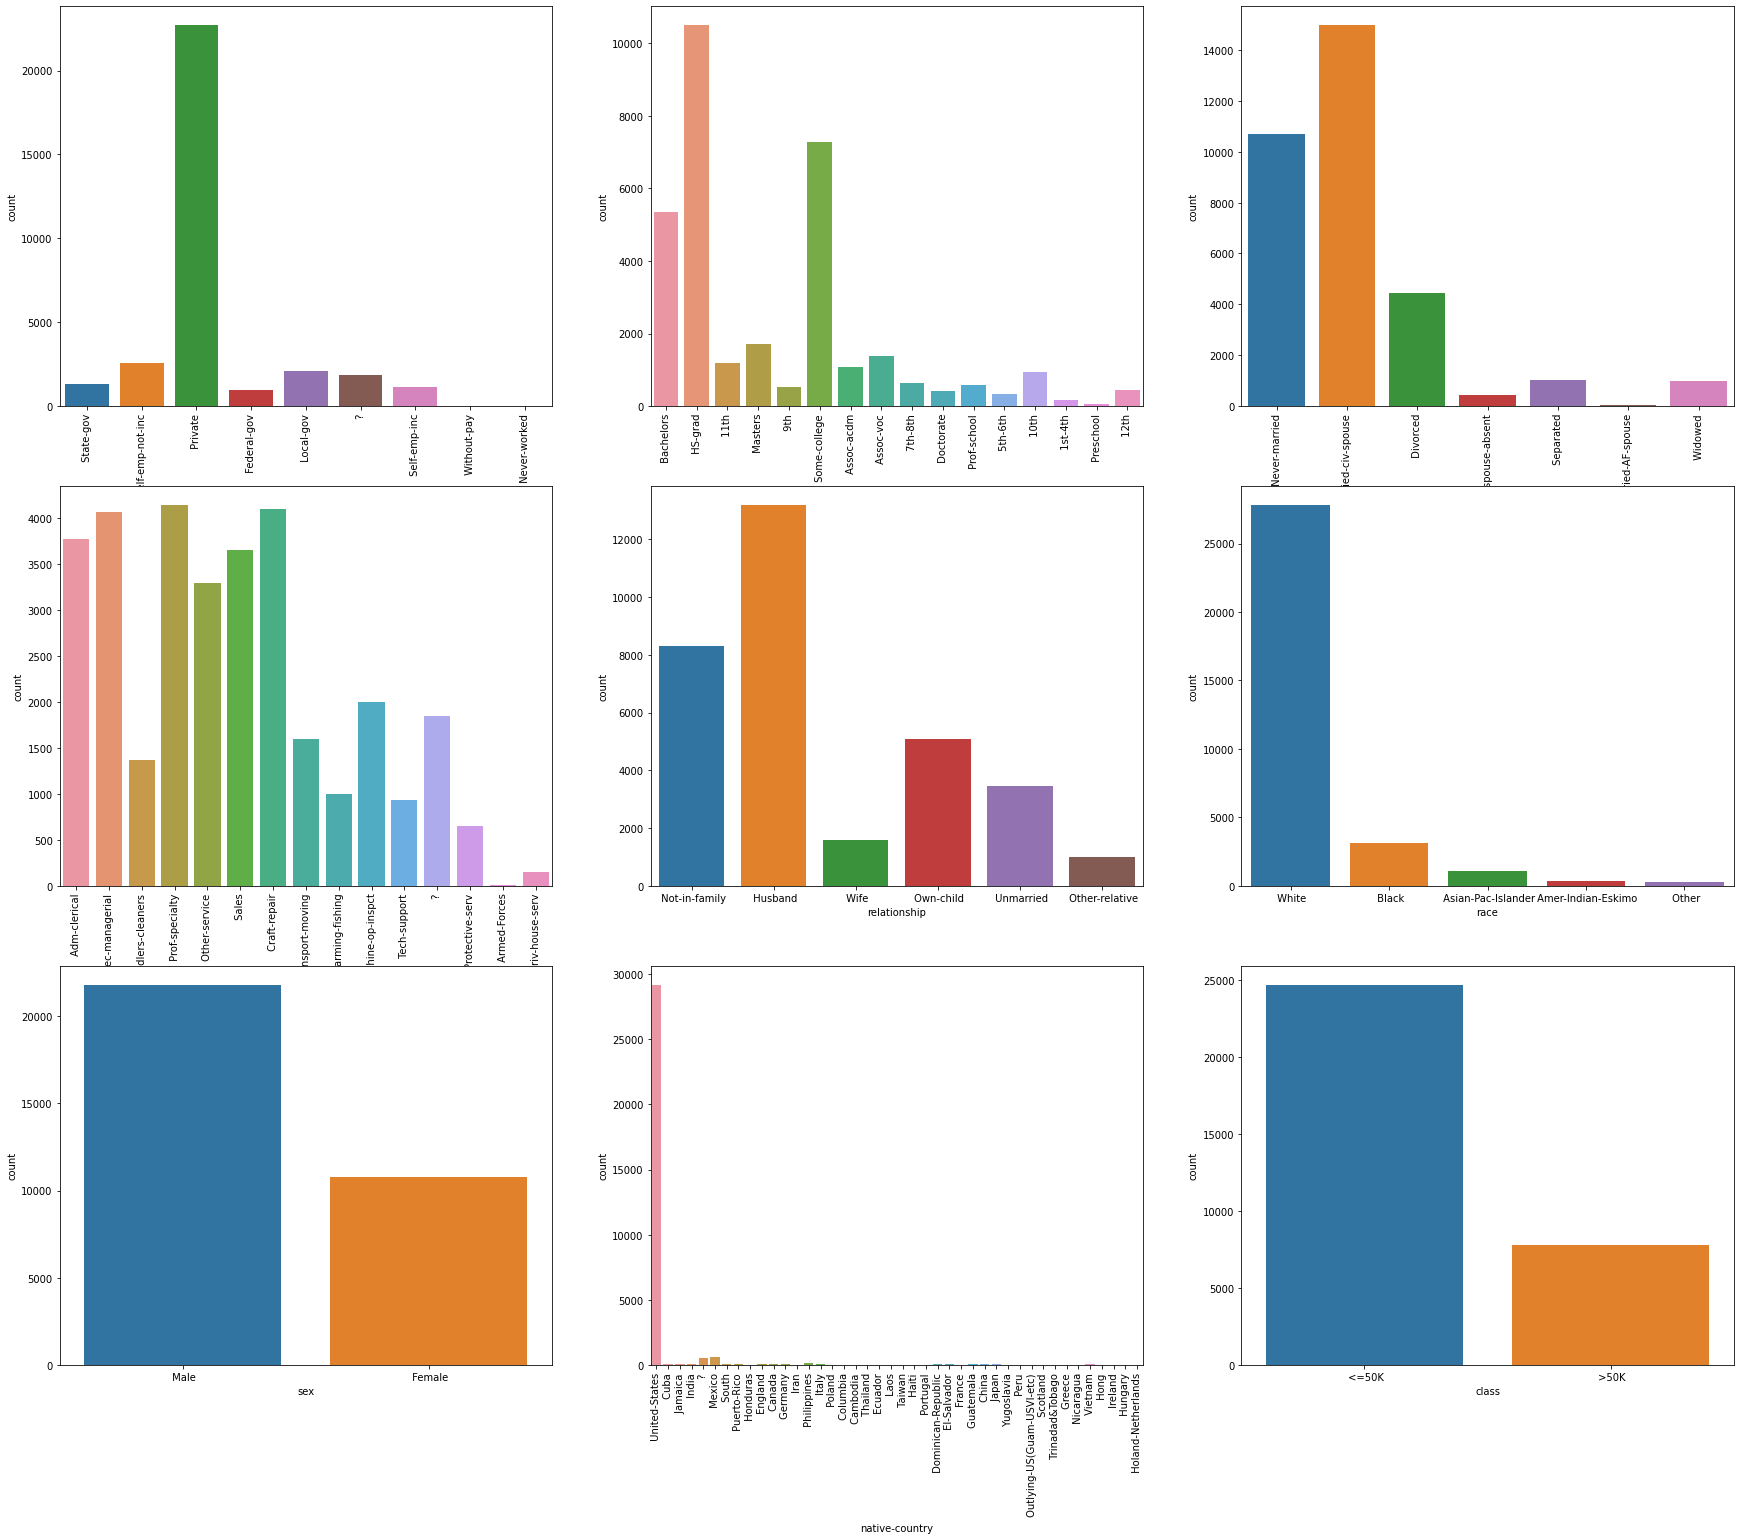

In [18]:
#Creating count plot for categorical variables: 

import seaborn as sns

fig, ax = plt.subplots(3, 3, figsize=(30, 25))

for variable, subplot in zip(categorical_labels, ax.flatten()):
    sns.countplot(salary[variable], ax=subplot)
    #rotate x axix labels that are longer:
    if not ((variable == "race") or (variable == "relationship") or (variable == "sex") or (variable == "class")):
        for label in subplot.get_xticklabels():
            label.set_rotation(90)

#### Inferences from count plot: 

- Workclass/occupation/country have Missing category = '?'. 
- Most people working in private sector. 
- Most instances for race = white. Need to deal with this. We will group "White" as one race and everything else as "Other". 
- Most instances for native-country = US. We will group all countries that are not "USA" as other.

#### Unscaled Crosstab-Plots for Categorical/Ordinal features: 

Cross-tab is a great way to juxtapose categories with the classes associated. Since we have a few features, we can create a cross-tab plot to concisely study each feature.

/Users/ashwinpadmanabhan/Desktop/Spring2020/Aunalytics_ProblemStatement/AEnv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/ashwinpadmanabhan/Desktop/Spring2020/Aunalytics_ProblemStatement/AEnv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/ashwinpadmanabhan/Desktop/Spring2020/Aunalytics_ProblemStatement/AEnv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be remo

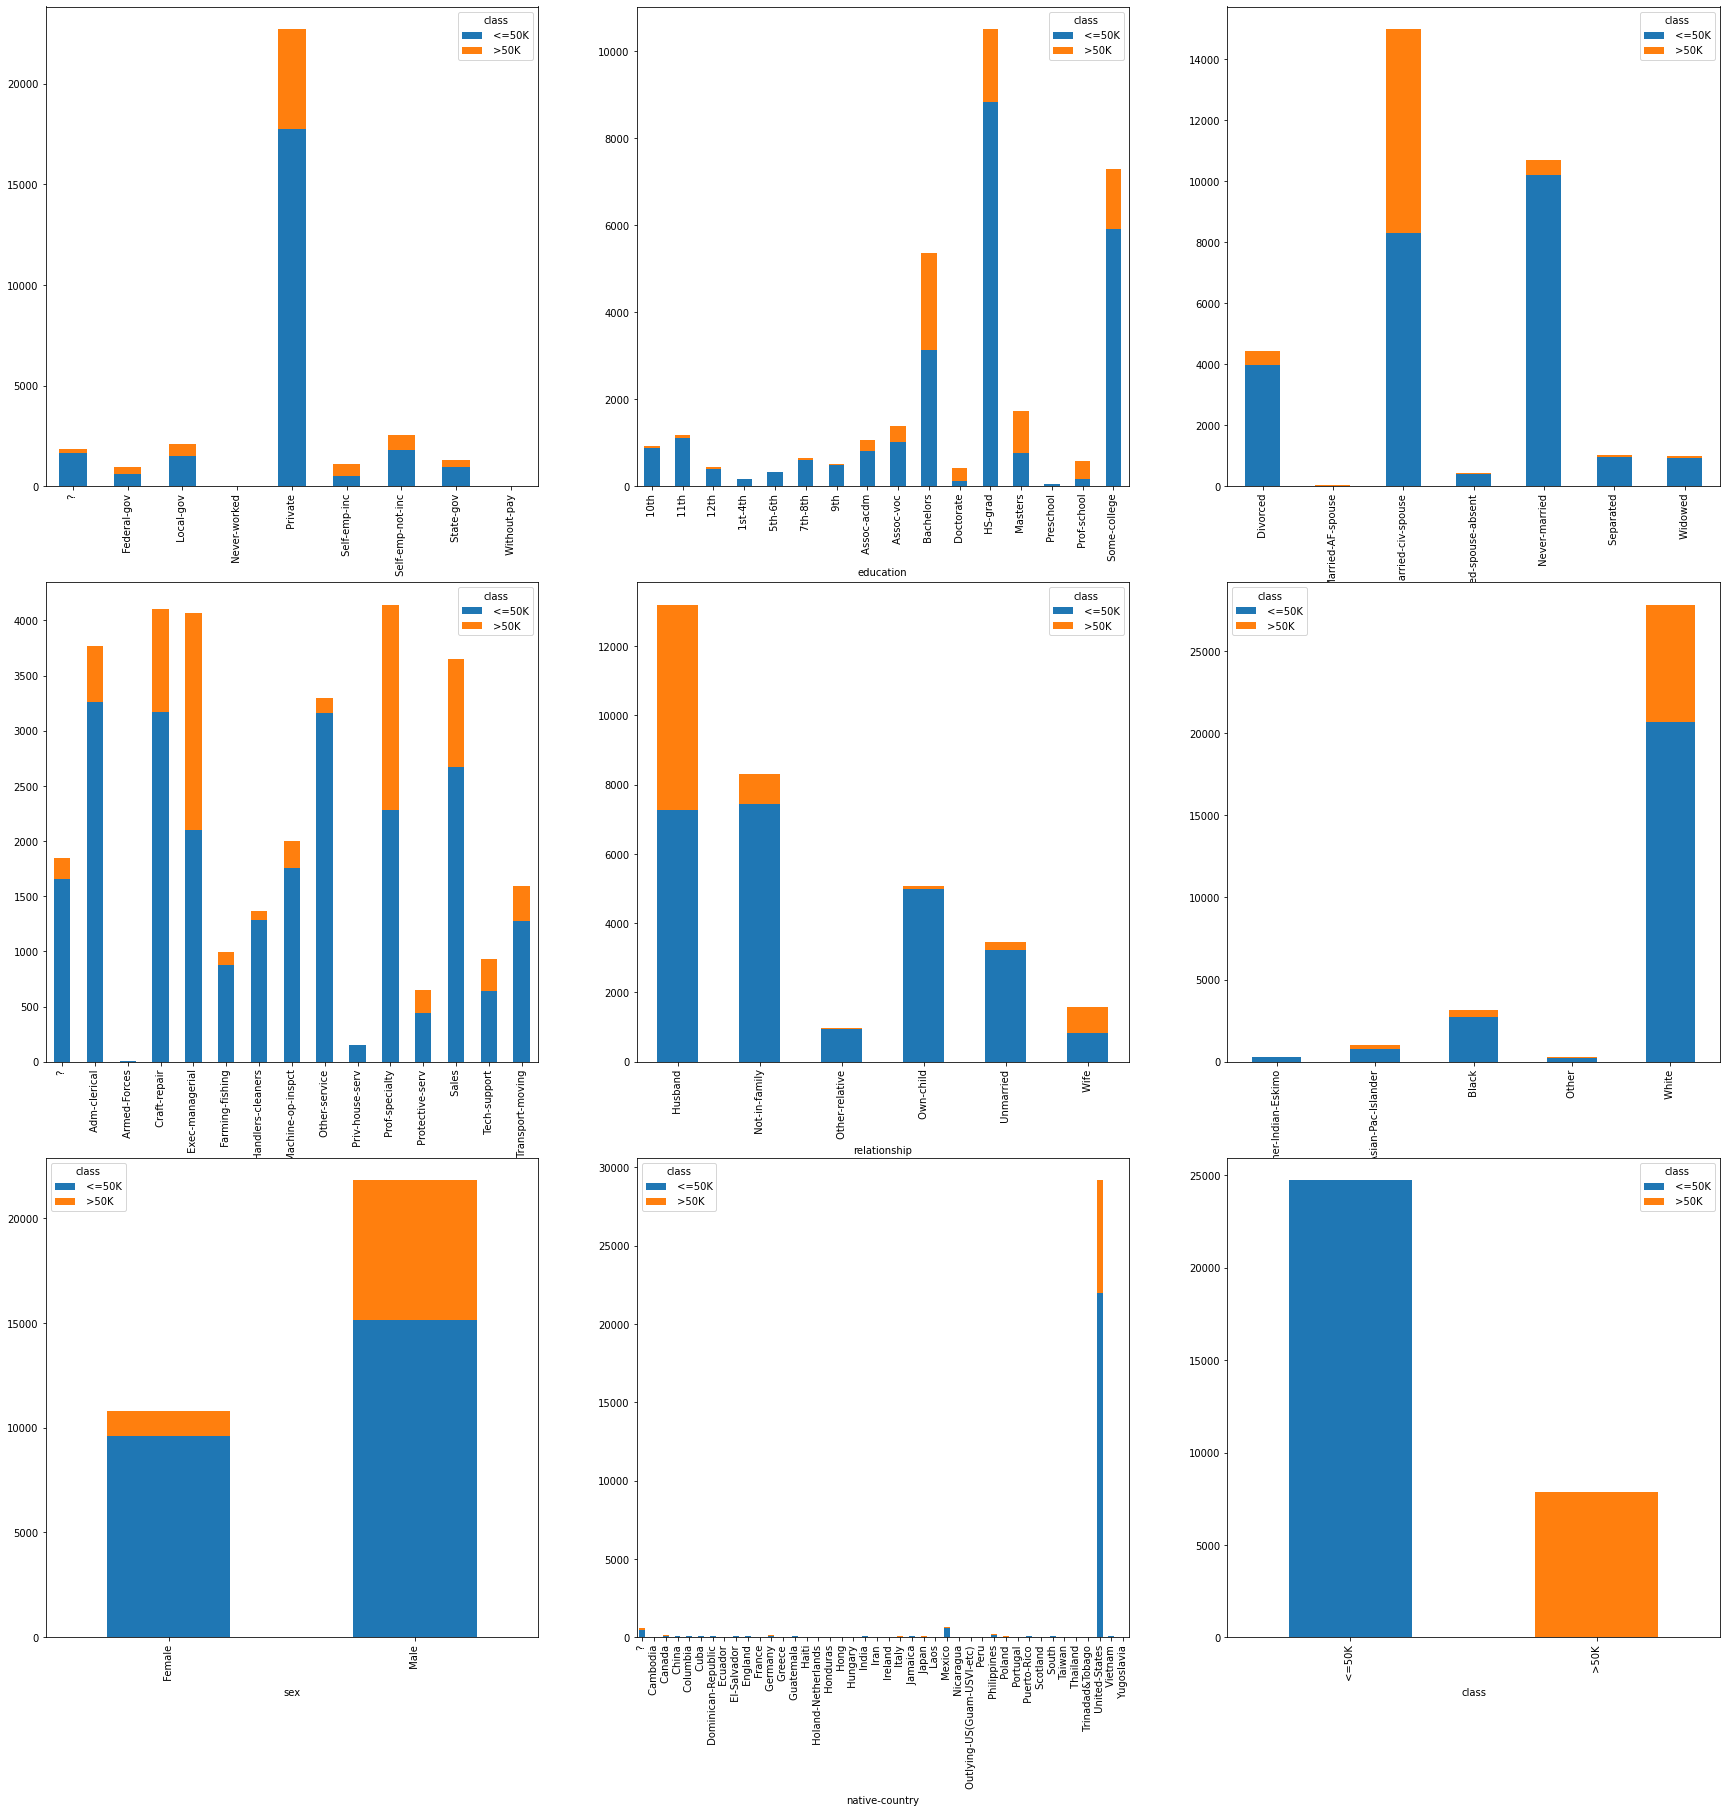

In [19]:
fig, ax = plt.subplots(3, 3, figsize=(30, 30))
for variable, subplot in zip(categorical_labels, ax.flatten()):
    cross_tab = pd.crosstab(index= salary[str(variable)], 
                          columns=salary["class"])
    cross_tab.plot(kind="bar",stacked=True, ax = subplot)

#### Inferences from un-scaled cross-tab plots: 

- By Family status: Married-civ-spouse contribute a lot of instances to class >50k, let us call this the positive class going forward. 
- By Occupation: Adm-clerical, craft-repair, exec-managerial, prof-speciality, sales are pretty frequent and comparible to one another, of which Prof-Speciality, Exec-speciality and Sales seem to contibute a lot of instances towards the positive class. 
- By Relationship: Husband has lot of instances and a significant contribution (in terms of number, not percent) towards the postive class. 
- By Sex: Males have more in positive class than females, though the number of males is also significantly higher than females in the data set.

This does indeed give us some insights, especially when it comes to sheer number of contibutions to each class. However, to compare categories within each feature, we will normalize. 

#### Normalized Crosstab-Plots for Categorical/Ordinal features: 

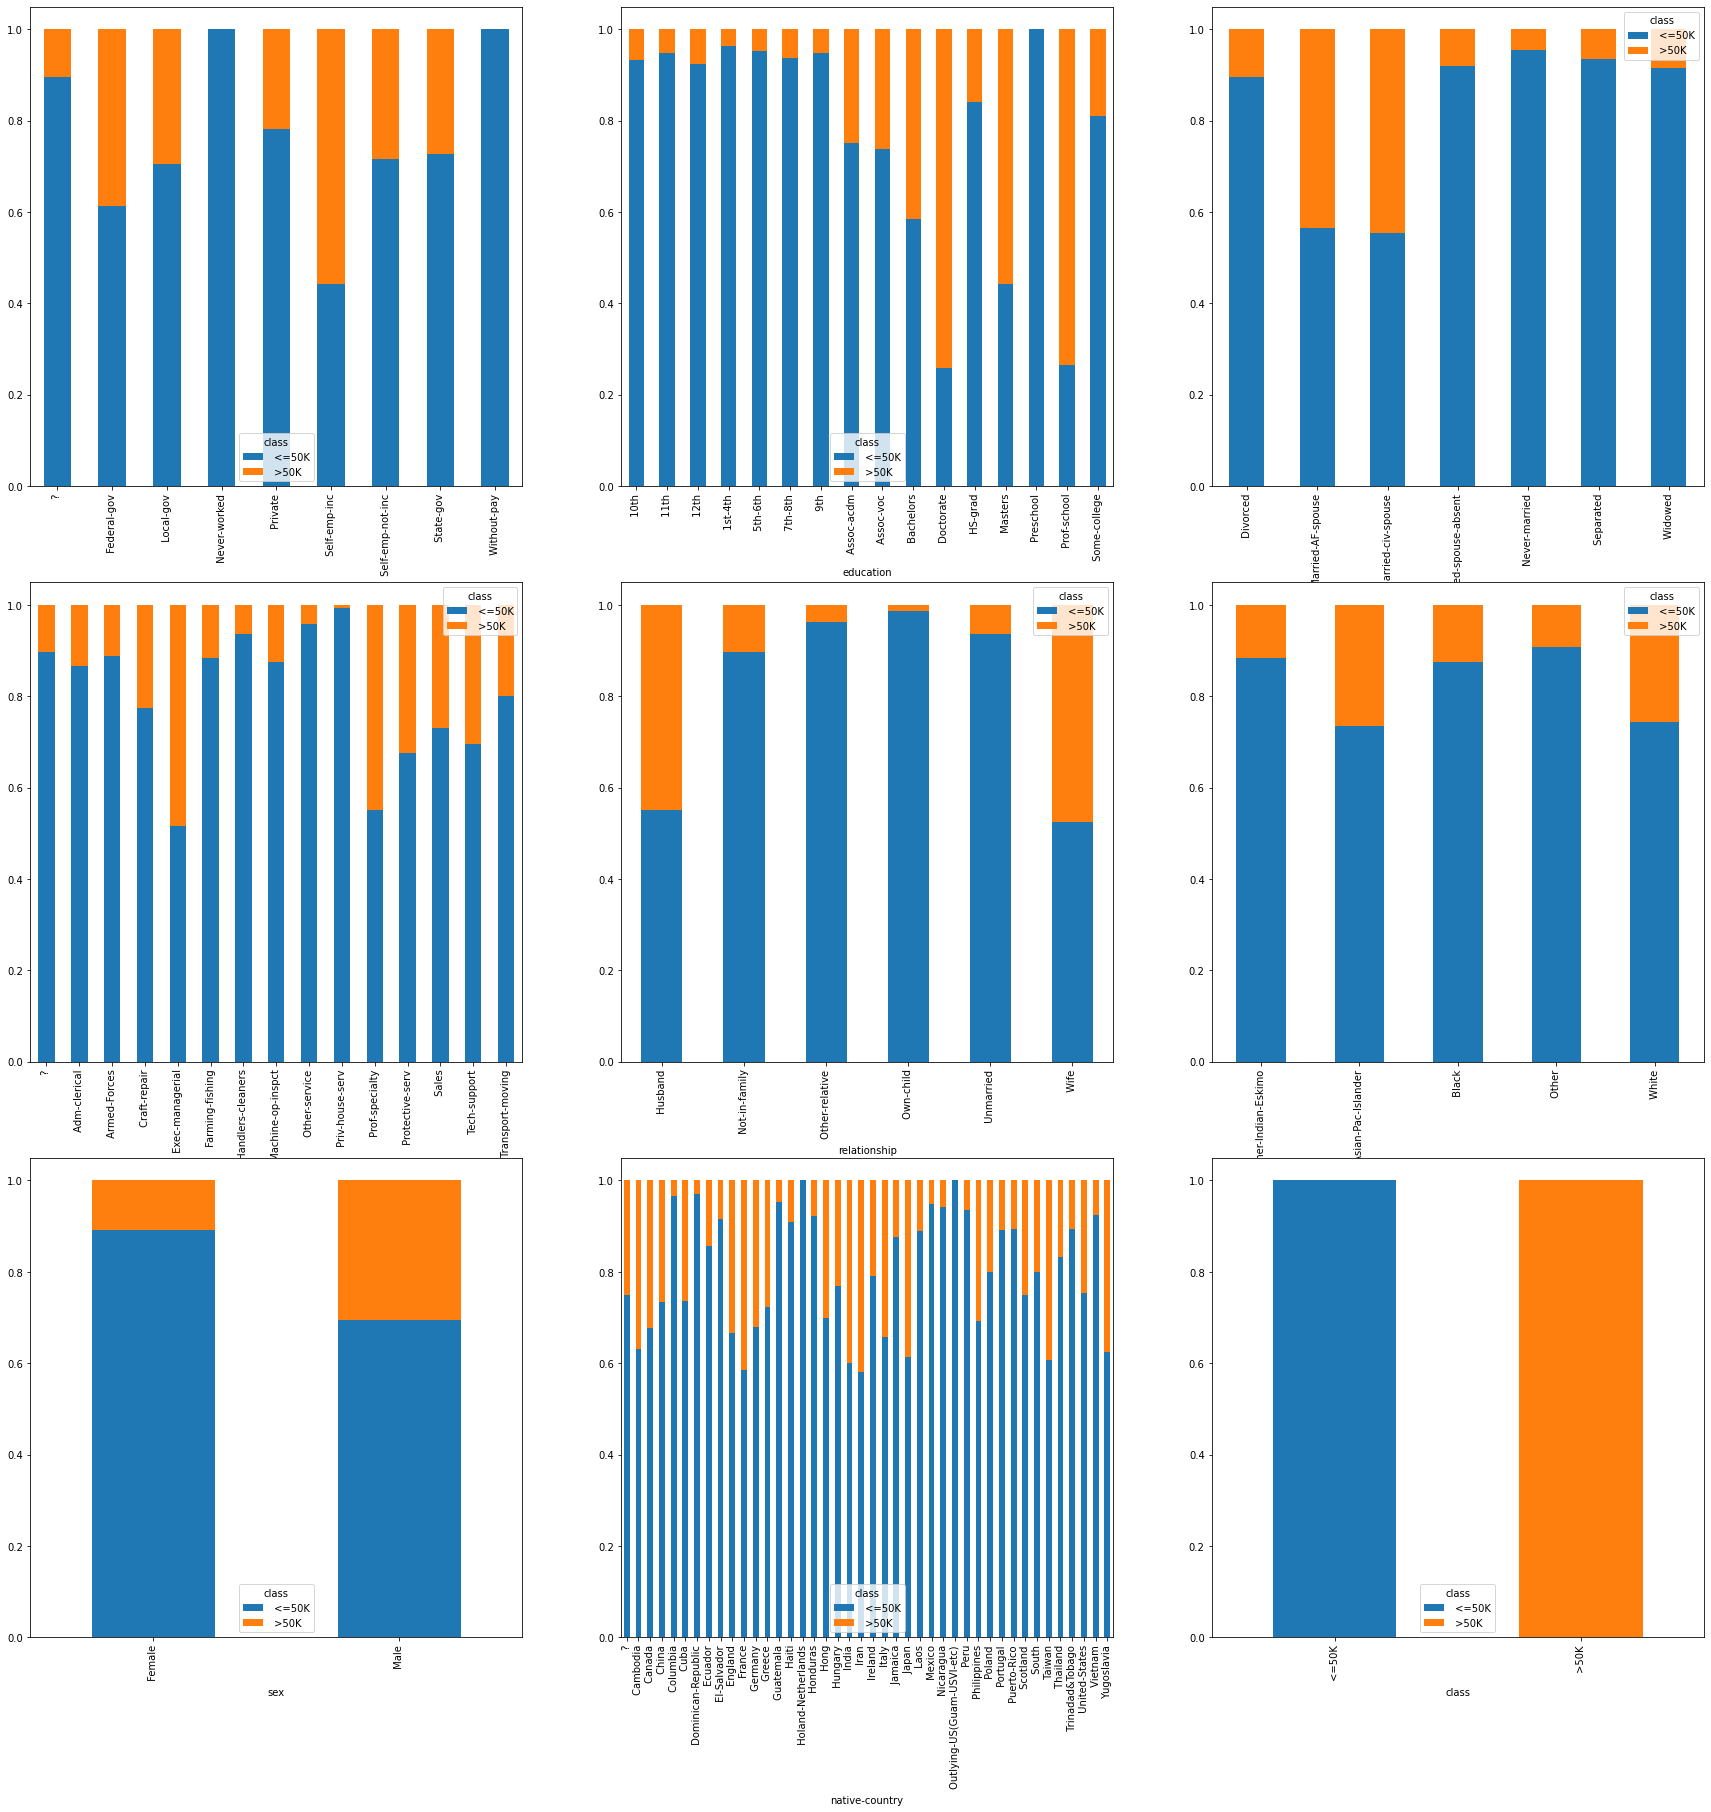

In [20]:
fig, ax = plt.subplots(3, 3, figsize=(30, 30))
for variable, subplot in zip(categorical_labels, ax.flatten()):
    cross_tab = pd.crosstab(index= salary[str(variable)], 
                          columns=salary["class"], normalize = "index")
    cross_tab.plot(kind="bar",stacked=True, ax = subplot)

#### Inferences from Cross-tab plots:

- By Job-type: High portion Self-emp-inc have high salaries, Moderate portion of Federal/local/state gov employees have high salary. People who never work or work without pay always earn are in the negative class. 
- By Education: Phd, Master, prof-school more likely to earn more than other education categories.
- By Marital status: Married-vic/AF-spouse more likely to earn more. That is married people more likely to belong in the positive class. 
- By Profession: Exec-Managers/Prof-speciality have portion of them in the positive class followed by people in sales, tech-support and protective-services. 
- By Family status: Husband and Wife more like to earn more than others. 
- By Race = White and Asians more likely to earn more. However, the training data is skewed and has a disprotionate number of white compared to other races.
- By Gender = Higher portion of Males earn more than females. 
- By Nationality: Countries data is very skewed. Inferences must be drawn carefully. 

## Step 3: Feature selection: 

Based on the bunch of inferences we drew in the EDA step, we will proceed to feature selection. The first thing we must check is if the features "education" and "education-num" are actually giving the same information. Let us check: 

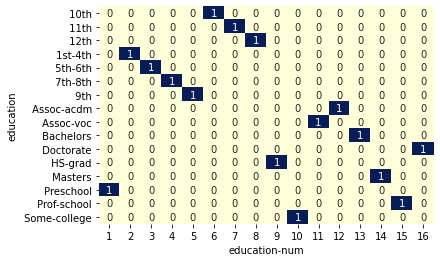

In [21]:
import numpy as np
cross_tab_education = pd.crosstab(index= salary["education"], 
                      columns=salary["education-num"], normalize = "index")
sns.heatmap(cross_tab_education,
            cmap="YlGnBu", annot=True, cbar=False)

- The cross-tab output is irrefutable. They are absolutely the same thing. We can drop one of these features. Let us drop the categorical feature "education" and hold on to "education-num"! 
- We have also decided to drop the fnlwgt feature from the EDA. 

### Data Cleaning.   

Quick note: I first ran the 4 models (discussed below) first on a pipeline that had everything except the "education" feature. This was done to compare and observe how the features behave as is. However, this slowing traning time and I came back to create a new pipeline that does the following: 

- Remove fnlweight. 
- Capital Gain and Capital Loss is subtracted and reported as "worth".
- Characterize "USA" as "USA" and all other countries as "Other". 
- Characterize "White" as "White" and "Other" for other races. 
- Bin the ages. 

This has not been shown in this notebook for the sake of brevity. 

Getting back, the data is cleaned and modified for it to be model ready. First the target class is encoded into 0s and 1s. 0 corresponds to the class "<50k". 

In [22]:
#Converting target class to 0s and 1s.

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
salary_classed = salary["class"]
salary_target_encoded= encoder.fit_transform(salary_classed)

In [23]:
#Removing the target class from the list of categorical features. 

categorical_labels.remove("class")

We will build towards cleaning data such that they eventually can be used in a pipeline. sklean pipelines have no way to directly work on pd dataframes. Let us create a custom tranformer for this task. 

In [24]:
#Create a custom tranformer to feed pd df into sklearn pipeline. 

from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        #print(X[self.attribute_names].values)
        return X[self.attribute_names].values

#To check
dfselector = DataFrameSelector(categorical_labels)
salary_cat = dfselector.fit_transform(salary)
salary_cat

array([[' State-gov', ' Bachelors', ' Never-married', ..., ' White',
        ' Male', ' United-States'],
       [' Self-emp-not-inc', ' Bachelors', ' Married-civ-spouse', ...,
        ' White', ' Male', ' United-States'],
       [' Private', ' HS-grad', ' Divorced', ..., ' White', ' Male',
        ' United-States'],
       ...,
       [' Private', ' HS-grad', ' Widowed', ..., ' White', ' Female',
        ' United-States'],
       [' Private', ' HS-grad', ' Never-married', ..., ' White', ' Male',
        ' United-States'],
       [' Self-emp-inc', ' HS-grad', ' Married-civ-spouse', ...,
        ' White', ' Female', ' United-States']], dtype=object)

Next let us create a custom tranformer to remove the attribute "education" as discussed in the EDA step. 

In [25]:
#Custom tranformer to remove "education". 

education_ix = 1

class RemoveAttribute(BaseEstimator, TransformerMixin):
    def __init__(self, index_remove = 1):
        self.index_remove = index_remove
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        Xnew = np.delete(X, self.index_remove, axis = 1)
        return Xnew

#To check
attr_remove = RemoveAttribute(index_remove = education_ix)
salary_less_attr = attr_remove.transform(salary_cat)
salary_less_attr[27]

array([' ?', ' Married-civ-spouse', ' ?', ' Husband',
       ' Asian-Pac-Islander', ' Male', ' South'], dtype=object)

As noted in EDA, we have some missing categories in the form of '?'. One way to go is to drop these instances all together. However, Let us just replace these with a new category called "Missing". Atleast for now.  
Let us create a custom tranfomer to replace the "?" with "Missing". We will re-use this tranformer again. 

In [26]:
#Custom tranformer to replace something with something else. 

class replacefeature(BaseEstimator, TransformerMixin):
    def __init__(self, replacestr= " ?", indices = [0,2,6], replace_with = "Missing", replace_inverted = True):
        self.replacestr = replacestr
        self.indices = indices
        self.replace_with = replace_with
        self.replace_inverted = replace_inverted
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        for i in range(len(X)):
            for j in self.indices:
                if self.replace_inverted:
                    if X[i][j] == self.replacestr:
                        X[i][j]= self.replace_with
                else:
                    if X[i][j] != self.replacestr:
                        X[i][j]= self.replace_with
        return X

#To check. 
attr_replace = replacefeature(replacestr= " ?")
salary_modify_attr = attr_replace.transform(salary_less_attr)
salary_modify_attr[27]

array(['Missing', ' Married-civ-spouse', 'Missing', ' Husband',
       ' Asian-Pac-Islander', ' Male', ' South'], dtype=object)

We will create a tranformer to get the "worth" from captial-gain and capital-loss

In [27]:
# Define a custom tranfomer to define "worth". 

class ModifyAttributes(BaseEstimator, TransformerMixin):
    def __init__(self, first_ix, second_ix):
        self.first_ix = first_ix
        self.second_ix = second_ix
    def fit(self, X, y= None):
        return self
    def transform(self, X, y= None):
        worth = X[:, self.first_ix] - X[:, self.second_ix]
        return np.c_[X, worth]

Creating tranformer to bin things (age, for example). 

In [28]:
class binner(BaseEstimator, TransformerMixin):
    def __init__(self, ix = 0, bins = [30, 60, 90]):
        self.ix = ix
        self.bins = bins
    def fit(self, X, y = None):
        return self
    def transform(self, X, y= None):
        arr = X[:, self.ix]
        final_bins = np.digitize(arr, bins = self.bins)
        #print(age_bins)
        return np.c_[X, final_bins]

In [29]:
#Create a pipeline to perform all discussed tranformations: 
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

salary = train_set.copy()

numerical_labels = list(salary.select_dtypes(include=['int64']).columns)

categorical_labels = list(salary.select_dtypes(include=['object', 'category']).columns)
categorical_labels.remove("class")


num_pipeline2 = Pipeline([
                ('selector', DataFrameSelector(numerical_labels)),
                ('removeattr', RemoveAttribute(index_remove = 1)), #remove fnlweight
                ('modifyattr', ModifyAttributes(2,3)), #modify capital gain and capital loss 
                ('worth_binner', binner(ix = 5, bins = [6000])), #binning worth
                ('age_binner', binner(ix = 0)), #binning age. 
                ('removeattr_age',RemoveAttribute(index_remove = 0)), #remove age
                ('removeattr_gain',RemoveAttribute(index_remove = 2)), #remove capital gain
                ('removeattr_loss',RemoveAttribute(index_remove = 3)), #remove capital loss
                ('removeattr_weight',RemoveAttribute(index_remove = 1)), #remove worth
])

cat_pipeline2 = Pipeline([
                ('selector', DataFrameSelector(categorical_labels)),
                ('removeattr', RemoveAttribute(index_remove = 1)),
                ("replacecountry", replacefeature(replacestr= " United-States", replace_with = "Other", replace_inverted = False, indices = [6])),
                ("replacerace" ,replacefeature(replacestr= " White", replace_with = "Other", replace_inverted = False, indices = [4] )),
                ("OneHot",OneHotEncoder() )
])

We can consolidate the two pipelines to create a single pipeline to convert our raw data to model-ready data. 

In [30]:
#Pipeline union. 

full_pipeline2 = FeatureUnion(transformer_list = [
                                ("num_pipeline", num_pipeline2), 
                                ("cat_pipeline", cat_pipeline2)
])

In [31]:
#Running the pipeline. 

salary_modelready2 = full_pipeline2.fit_transform(salary)
#salary_ModelReady

## Step 4: Selecting and Traning a Model:

I initially experiment with 4 models. They are: 

- Stochastic Gradient Descent Classifier. 
- SVC Classifier. 
- Decision Tree classifier. 
- Random Forest classifier. 

#### Model 1: SGDC: 

In [32]:
#Defining the model: 
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

def calcAccuracy(y_train_pred_2, salary_target_encoded = salary_target_encoded ):
    return round(len(np.where(y_train_pred_2 == salary_target_encoded)[0])/len(y_train_pred_2), 6)*100

sgd_clf_2 = SGDClassifier(random_state= 39)

#Cross validation of model:
y_train_pred_2_pp = cross_val_predict(sgd_clf_2, salary_modelready2, salary_target_encoded, cv = 3, method = "decision_function" )

y_train_pred_2 = [1 if i > 0 else 0 for i in y_train_pred_2_pp]

print("Confusion Matrix: ")
confusion_matrix(salary_target_encoded, y_train_pred_2)

precision_2 = precision_score(salary_target_encoded, y_train_pred_2 )
recall_2 = recall_score(salary_target_encoded, y_train_pred_2 )

print("Precision =", round(precision_2,6)*100, "%, Recall = ", round(recall_2,6)*100, "%" )

print("Accuracy = ", calcAccuracy(y_train_pred_2), "%" )

Confusion Matrix: 


array([[22539,  2181],
       [ 4263,  3578]])

Precision = 62.1288 %, Recall =  45.631899999999995 %
Accuracy =  80.2095 %


The confusion matrix gives us a measure of the bifucation of how many instances were TP, FP, TN, FN. A more concise measures are precision and recall. Which have been reported above. A measure that is even more concise is the F1-score, which is the Harmonic mean of the precision and recall. 
Since the problem statement asks us to gauge the models using Accuracy, hence we will use accuracy. However, it is to be noted that accuracy is not always a appropriate measure. 

Above, the recall is pretty poor and the precision isn't really all that great. 

#### Model 2: SVC :

Let us train a SVC and check it's performance via CV. 

In [49]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C = 3, loss = "hinge")

y_train_svm_pred_pp = cross_val_predict(svm_clf, salary_modelready2, salary_target_encoded, cv = 3, method = "decision_function" )

y_train_svm_pred = [1 if i > 0 else 0 for i in y_train_svm_pred_pp]

print("Confusion Matrix =")
print(confusion_matrix(salary_target_encoded, y_train_svm_pred))

precision_svm = precision_score(salary_target_encoded, y_train_svm_pred )
recall_svm = recall_score(salary_target_encoded, y_train_svm_pred )

print("Precision =", round(precision_svm,6)*100, "%, Recall = ", round(recall_svm,6)*100, "%" )

print("Accuracy = ", calcAccuracy(y_train_svm_pred), "%" )

/Users/ashwinpadmanabhan/Desktop/Spring2020/Aunalytics_ProblemStatement/AEnv/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Confusion Matrix =
[[22334  2386]
 [ 4430  3411]]
Precision = 58.8408 %, Recall =  43.5021 %
Accuracy =  79.067 %


The SVG seems to be doing better in all fronts, the accuracy, precision and the recall compared to the SGDC. Let us now train a Decision Tree (DT). 

#### Model 3: Decision Tree classifier:

In [50]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
#tree_clf.fit(salary_tree_ready, salary_target_encoded)

y_train_tree_pred_pp = cross_val_predict(tree_clf, salary_modelready2, salary_target_encoded, cv = 3, method = "predict_proba" )

y_train_tree_pred = [1 if i > 0.5 else 0 for i in y_train_tree_pred_pp[:,1]]

print("Confusion Matrix =")
confusion_matrix(salary_target_encoded, y_train_tree_pred)

precision_tree = precision_score(salary_target_encoded, y_train_tree_pred )
recall_tree = recall_score(salary_target_encoded, y_train_tree_pred )

print("Precision =", round(precision_tree,6)*100, "%, Recall = ", round(recall_tree,6)*100, "%" )

print("Accuracy = ", calcAccuracy(y_train_tree_pred), "%" )

Confusion Matrix =


array([[22243,  2477],
       [ 3347,  4494]])

Precision = 64.4671 %, Recall =  57.3141 %
Accuracy =  82.11359999999999 %


The decision tree isn't great. Though the Accuracy is comparable to the SVC (though lower still), the recall for the DT is significantly lower than the SVC. Let us see how the Random Forest Classifier Fares. 

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 100, max_features = 40)

y_train_rf_pred_pp = cross_val_predict(rf_clf, salary_modelready2, salary_target_encoded, cv = 3, method = "predict_proba" )

y_train_rf_pred = [1 if i > 0.5 else 0 for i in y_train_rf_pred_pp[:,1]]

print("Confusion Matrix is= ")
print(confusion_matrix(salary_target_encoded, y_train_rf_pred))

precision_rf = precision_score(salary_target_encoded, y_train_rf_pred )
recall_rf = recall_score(salary_target_encoded, y_train_rf_pred )

print("Precision =", round(precision_rf, 6)*100, "%, Recall = ", round(recall_rf,6)*100,"%" )

print("Accuracy = ", calcAccuracy(y_train_rf_pred), "%" )

Confusion Matrix is= 
[[22413  2307]
 [ 3120  4721]]
Precision = 67.1742 %, Recall =  60.209199999999996 %
Accuracy =  83.33279999999999 %


This isn't bad. The RF classifier produces a accuracy and precision better than the other models and though at a slightly lower recall value. 

In [52]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), n_estimators = 1500, learning_rate = 1)
y_ada_pred_pp = cross_val_predict(ada_clf,salary_modelready2, salary_target_encoded, cv= 3, method = "decision_function")

y_ada_pred = [1 if i>0 else 0  for i in y_ada_pred_pp]

print("Confusion Matrix is= ")
print(confusion_matrix(salary_target_encoded, y_ada_pred))

precision_ada = precision_score(salary_target_encoded, y_ada_pred )
recall_ada = recall_score(salary_target_encoded, y_ada_pred )

print("Precision =", round(precision_ada, 6)*100, "%, Recall = ", round(recall_ada,6)*100,"%" )

print("Accuracy = ", calcAccuracy(y_ada_pred), "%" )

Confusion Matrix is= 
[[22671  2049]
 [ 3018  4823]]
Precision = 70.18339999999999 %, Recall =  61.51 %
Accuracy =  84.4384 %


This seems to be doing much better. The Precision and Accuracy are high and the recall is better than most models. Let us check the ROC curves and the area under them for the 5 models tested. 

Let us now try the Gradient Boosting ensemble:

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

gra_clf = GradientBoostingClassifier(n_estimators=500)
y_gra_pred_pp = cross_val_predict(gra_clf,salary_modelready2, salary_target_encoded, cv= 3, method = "decision_function")

y_gra_pred = [1 if i>0 else 0  for i in y_gra_pred_pp]

print("Confusion Matrix is= ")
print(confusion_matrix(salary_target_encoded, y_gra_pred))

precision_gra = precision_score(salary_target_encoded, y_gra_pred )
recall_gra = recall_score(salary_target_encoded, y_gra_pred )

print("Precision =", round(precision_gra, 6)*100, "%, Recall = ", round(recall_gra,6)*100,"%" )

print("Accuracy = ", calcAccuracy(y_gra_pred), "%" )


Confusion Matrix is= 
[[23005  1715]
 [ 3071  4770]]
Precision = 73.5544 %, Recall =  60.8341 %
Accuracy =  85.3014 %


In [60]:
from sklearn.metrics import roc_curve

fpr_sgdc, tpr_sgdc, thresholds_sgdc = roc_curve(salary_target_encoded, y_train_pred_2_pp)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(salary_target_encoded, y_train_svm_pred_pp)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(salary_target_encoded, y_train_tree_pred_pp[:,1])
fpr_rf, tpr_rf, thresholds_dt = roc_curve(salary_target_encoded, y_train_rf_pred_pp[:,1])
fpr_ada, tpr_ada, thresholds_ada = roc_curve(salary_target_encoded, y_ada_pred_pp)
fpr_gra, tpr_gra, thresholds_gra = roc_curve(salary_target_encoded, y_gra_pred_pp)


In [61]:
from sklearn.metrics import roc_auc_score

auc_sgd = roc_auc_score(salary_target_encoded, y_train_pred_2_pp)
auc_svm = roc_auc_score(salary_target_encoded, y_train_svm_pred_pp)
auc_dt = roc_auc_score(salary_target_encoded, y_train_tree_pred_pp[:,1])
auc_rf = roc_auc_score(salary_target_encoded, y_train_rf_pred_pp[:,1])
auc_ada = roc_auc_score(salary_target_encoded,y_ada_pred_pp)
auc_gra = roc_auc_score(salary_target_encoded,y_gra_pred_pp)


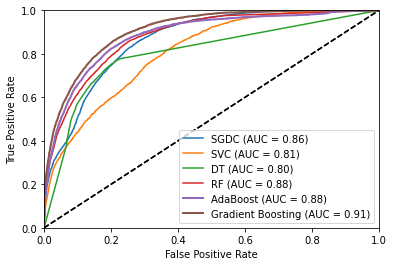

In [62]:
def plot_roc(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

plt.plot(fpr_sgdc, tpr_sgdc, label = "SGDC (AUC = %0.2f)"%auc_sgd )
plt.plot(fpr_svc, tpr_svc, label = "SVC (AUC = %0.2f)"%auc_svm)
plt.plot(fpr_dt, tpr_dt, label = "DT (AUC = %0.2f)"%auc_dt)
plt.plot(fpr_rf, tpr_rf, label = "RF (AUC = %0.2f)"%auc_rf)
plot_roc(fpr_ada, tpr_ada, "AdaBoost (AUC = %0.2f)"%auc_ada)
plot_roc(fpr_gra, tpr_gra, "Gradient Boosting (AUC = %0.2f)"%auc_gra)

plt.legend(loc="lower right")
plt.show()

Going by the Accuracy, precision, confusion matrix values and to some extent the ROC-AUC, we conclude that the Gradient Boosting model works the best. Let us proceed to tune it's parameters. 

### Step 5: Tuning hyper-parameters: 

Let us use a randomized grid search to look for good combination of hyper-parameters. The following code has been commented as it takes a while to get.  

In [69]:

"""
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
    {'n_estimators': [300,400,500], 'learning_rate': [0.1,0.4,0.5,1,1.5], 
     'max_depth': [2,3,4], 'min_samples_split': [2,3,4]}
]
gra_clf_tuned = GradientBoostingClassifier()

rand_grid_search = RandomizedSearchCV(gra_clf_tuned, param_grid, scoring = 'accuracy')

rand_grid_search.fit(salary_modelready2,salary_target_encoded)
rand_grid_search.best_params_
"""

"\nfrom sklearn.model_selection import RandomizedSearchCV\n\nparam_grid = [\n    {'n_estimators': [300,400,500], 'learning_rate': [0.1,0.4,0.5,1,1.5], \n     'max_depth': [2,3,4], 'min_samples_split': [2,3,4]}\n]\ngra_clf_tuned = GradientBoostingClassifier()\n\nrand_grid_search = RandomizedSearchCV(gra_clf_tuned, param_grid, scoring = 'accuracy')\n\nrand_grid_search.fit(salary_modelready2,salary_target_encoded)\n"

Best parameters found at: n_estimators = 400, min_samples_split = 4, max_depth = 2, learning_rate = 0.1

In [72]:
encoder_test = LabelEncoder()
test_result_classed = test_set["class"]
test_result_encoded= encoder.fit_transform(test_result_classed)

test_set_modelready = full_pipeline2.fit_transform(test_set)

gra_clf_tuned = GradientBoostingClassifier(n_estimators=400, min_samples_split = 4, max_depth = 2, learning_rate = 0.1)

gra_clf_tuned.fit(salary_modelready2, salary_target_encoded)

final_predictions = gra_clf_tuned.predict(test_set_modelready)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [79]:
print("Confusion Matrix is= ")
print(confusion_matrix(test_result_encoded, final_predictions))

precision_final = precision_score(test_result_encoded, final_predictions )
recall_final = recall_score(test_result_encoded, final_predictions )

print("Precision =", round(precision_final, 6)*100, "%, Recall = ", round(recall_final,6)*100,"%" )

print("Accuracy = ", calcAccuracy(final_predictions, salary_target_encoded =test_result_encoded ), "%" )

Confusion Matrix is= 
[[11645   790]
 [ 1552  2294]]
Precision = 74.3839 %, Recall =  59.6464 %
Accuracy =  85.6151 %


In [3]:
len(test_set)

16281

In [34]:
"""
Why you are binning the age, worth. Show plots/Reason. 
Set threshold. 
Remove unwanted words. Dont be verbose. 
Why did you choose gradient boosting. 
"""

'\nWhy you are binning the age, worth. Show plots/Reason. \nSet threshold. \nRemove unwanted words. Dont be verbose. \n'